In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd


dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
new_dataset = dataset.select_dtypes('float64')

categories = dataset.select_dtypes(include=['float64'])

scaler = preprocessing.StandardScaler().fit(new_dataset)
numbers_scaled = scaler.transform(new_dataset)

encoder = preprocessing.OrdinalEncoder().fit(categories)
categories_encoded = encoder.transform(categories)


result = np.concatenate((numbers_scaled, categories_encoded), axis=1)
print(result)

[[-1.16032292e+00  1.42000000e+02]
 [-2.59628942e-01  4.98000000e+02]
 [-3.62660356e-01  4.36000000e+02]
 ...
 [-1.16863190e+00  1.37000000e+02]
 [ 3.20338211e-01  7.95000000e+02]
 [ 1.35896134e+00  1.38800000e+03]]


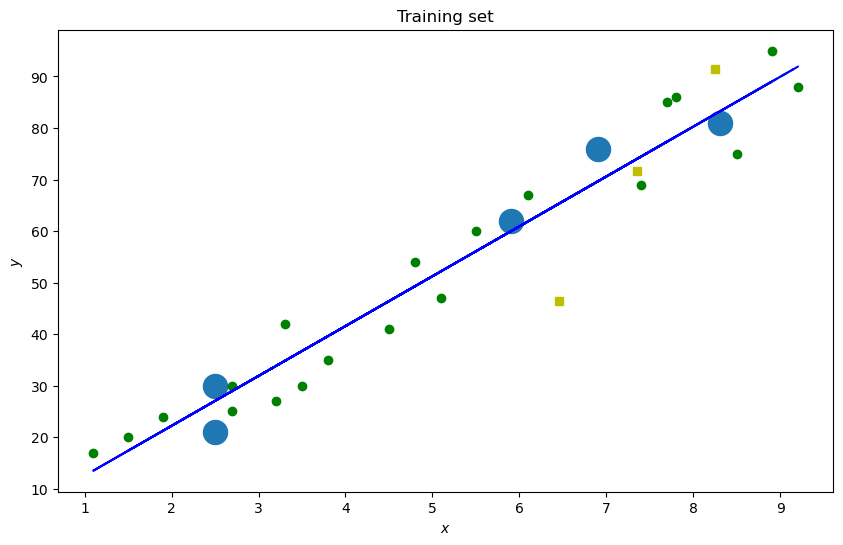

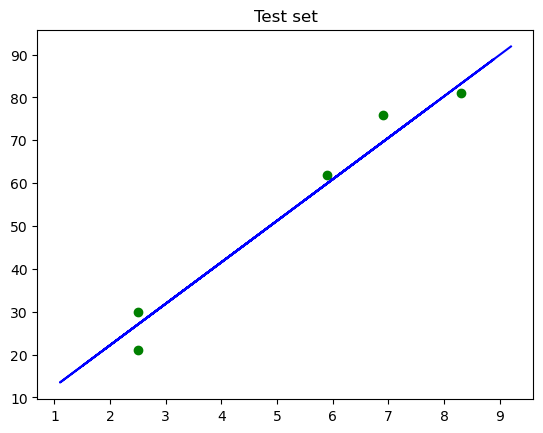

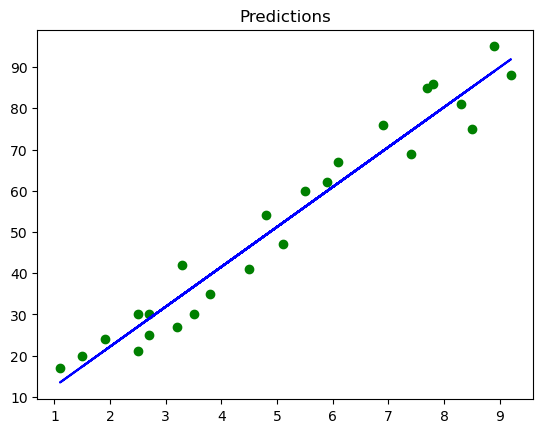

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


student_dataset = pd.read_csv('score.csv')

X = np.array(student_dataset['Hours'])
y = np.array(student_dataset['Scores'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

regression = LinearRegression().fit(X_train, y_train)

pred1 = regression.predict([[9.15]])
pred2 = regression.predict([[4.50]])
pred3 = regression.predict([[7.10]])

a = regression.coef_[0] # we have one feature with index 0

b = regression.intercept_

fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))


x = X_test.T

best_fit = b + a * (np.append(x, [9.15, 4.50, 7.10]))

ax_scat.scatter(x, y_test, s=300, label='Training Data')
ax_scat.plot(np.append(x,[9.15, 4.50, 7.10]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([8.25],pred1, "ys", label="LinearRegression")
ax_scat.plot([6.45],pred2, "ys", label="LinearRegression")
ax_scat.plot([7.35],pred3, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$')

plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, regression.predict(X_train), color='blue')
plt.title('Training set')
plt.show()

plt.scatter(X_test, y_test, color='green')
plt.plot(X_train, regression.predict(X_train), color='blue')
plt.title('Test set')
plt.show()

X = X.reshape(-1, 1)

plt.scatter(X, y, color='green')
plt.plot(X, regression.predict(X), color='blue')
plt.title('Predictions')
plt.show()

In [3]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"ElasticNet Regression-Training set score: {elasticnet.score(X_train, y_train):.2f}")
print(f"ElasticNet Regression-Test set score: {elasticnet.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.97
Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.97
ElasticNet Regression-Training set score: 0.95
ElasticNet Regression-Test set score: 0.97
